In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('2019.csv')
sui_df = pd.read_csv("master.csv")

In [3]:
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [6]:
sui_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [7]:
sum_df = sui_df.groupby("country").sum()
sum_df

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,,,,,,
Albania,527796,1970,62325467,924.76,32.304,490788
Antigua and Barbuda,647832,11,1990228,179.14,28.140,3385212
Argentina,744000,82219,1035985431,3894.59,93.552,2944044
Armenia,596832,1905,77348173,976.21,66.252,558428
Aruba,336720,101,1259677,1596.52,0.000,4069236
...,...,...,...,...,...,...
United Arab Emirates,144540,622,36502275,94.89,19.800,3035664
United Kingdom,744000,136805,1738767780,2790.92,103.620,11869908
United States,744000,1034013,8054027201,5140.97,106.992,14608296


In [10]:
my_dict = {} 
countries = sui_df["country"].value_counts()
for country in countries.keys():
    country_df = sui_df[sui_df["country"] == country]
    num = len(country_df["year"].value_counts())
    sui_per_yr = sum_df.loc[country]["suicides/100k pop"] / num
    my_dict[country] = sui_per_yr
my_dict

{'Iceland': 152.804375,
 'Mauritius': 139.51812499999994,
 'Netherlands': 127.07874999999991,
 'Austria': 283.63218749999993,
 'Greece': 48.77806451612902,
 'Spain': 113.19548387096778,
 'Colombia': 64.81903225806452,
 'Mexico': 56.489999999999995,
 'Brazil': 70.15225806451613,
 'Luxembourg': 198.59870967741918,
 'Argentina': 125.63193548387088,
 'United States': 165.8377419354839,
 'Israel': 107.41838709677415,
 'Japan': 258.87838709677413,
 'United Kingdom': 90.02967741935481,
 'Belgium': 254.85483870967752,
 'Malta': 60.38741935483869,
 'Singapore': 204.5477419354838,
 'Ecuador': 75.65193548387094,
 'Italy': 102.2216129032258,
 'Chile': 126.5045161290323,
 'Puerto Rico': 122.23483870967735,
 'Republic of Korea': 301.62741935483854,
 'Ireland': 129.39099999999996,
 'Australia': 155.9136666666668,
 'Bulgaria': 233.86933333333357,
 'Guatemala': 38.22333333333332,
 'Costa Rica': 85.12399999999994,
 'Norway': 155.29200000000003,
 'France': 260.1083333333334,
 'Sweden': 174.92399999999986

In [11]:
suicides = []
for index,row in data.iterrows():
    suicides.append(my_dict.get(row["Country or region"]))
suicides     

[273.2451724137931,
 169.16590909090894,
 155.29200000000003,
 152.804375,
 127.07874999999991,
 228.28904761904772,
 174.92399999999986,
 172.7006896551726,
 149.61103448275853,
 283.63218749999993,
 155.9136666666668,
 85.12399999999994,
 107.41838709677415,
 198.59870967741918,
 90.02967741935481,
 129.39099999999996,
 186.7188461538461,
 254.85483870967752,
 165.8377419354839,
 220.48111111111083,
 15.814999999999996,
 60.38741935483869,
 56.489999999999995,
 260.1083333333334,
 None,
 126.5045161290323,
 38.22333333333332,
 None,
 21.209999999999987,
 113.19548387096778,
 69.76239999999996,
 70.15225806451613,
 233.53428571428572,
 204.5477419354838,
 126.49750000000007,
 102.2216129032258,
 22.24952380952381,
 150.8254545454545,
 None,
 183.23416666666674,
 97.18954545454548,
 481.31272727272716,
 64.81903225806452,
 333.9342857142856,
 78.80333333333334,
 None,
 125.63193548387088,
 148.9839285714286,
 39.08399999999999,
 75.65193548387094,
 14.237200000000005,
 84.3810714285714

In [12]:
data["suicides/100k"] = suicides

In [13]:
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,suicides/100k
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,273.245172
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,169.165909
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,155.292000
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,152.804375
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,127.078750
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,NaN
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,NaN
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,NaN
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,NaN


In [19]:
## drop NaN entries
data = data.dropna()
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,suicides/100k
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,273.245172
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,169.165909
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,155.292000
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,152.804375
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,127.078750
...,...,...,...,...,...,...,...,...,...,...
106,107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027,42.034545
115,116,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064,39.048400
118,119,Georgia,4.519,0.886,0.666,0.752,0.346,0.043,0.164,50.744545
129,130,Sri Lanka,4.366,0.949,1.265,0.831,0.470,0.244,0.047,423.541818


In [14]:
## perfom linear regression on updated dataset
from sklearn.linear_model import LinearRegression

m = LinearRegression()

In [20]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=.2, random_state=42)

In [21]:
X_train = train_set.drop(["Overall rank", "Score", "Country or region"], axis=1)
X_test = test_set.drop(["Overall rank", "Score", "Country or region"], axis=1)
X_train

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,suicides/100k
9,1.376,1.475,1.016,0.532,0.244,0.226,283.632187
5,1.452,1.526,1.052,0.572,0.263,0.343,228.289048
36,1.362,1.368,0.871,0.536,0.255,0.110,22.249524
22,1.070,1.323,0.861,0.433,0.074,0.073,56.490000
32,1.124,1.465,0.891,0.523,0.127,0.150,233.534286
43,1.258,1.523,0.953,0.564,0.144,0.057,333.934286
42,0.985,1.410,0.841,0.470,0.099,0.034,64.819032
16,1.373,1.454,0.987,0.495,0.261,0.265,186.718846
81,1.181,1.156,0.999,0.067,0.000,0.034,48.778065
61,1.201,1.410,0.828,0.199,0.081,0.020,390.618077


In [22]:
y_train = train_set["Score"]
y_test = test_set["Score"]

In [23]:
m.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
m.score(X_train, y_train)

0.7568530307012002

In [28]:
m.score(X_test, y_test)

0.7742872099352892

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1dc14890>,
      dtype=object)

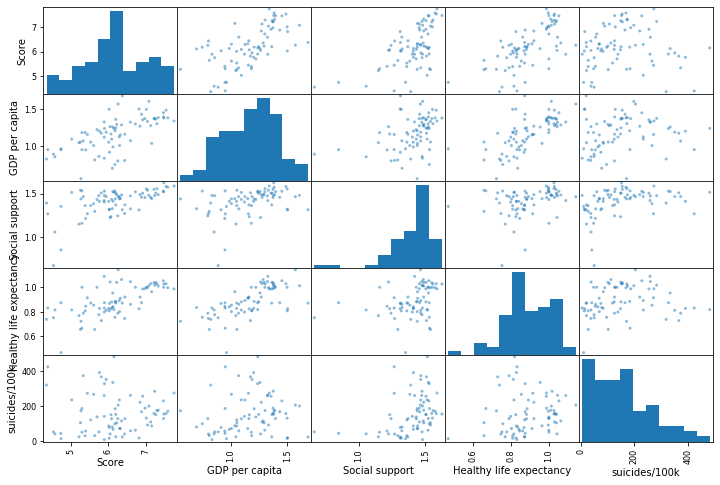

In [32]:
## sanity check
from pandas.plotting import scatter_matrix

attributes = ["Score", "GDP per capita", "Social support",
              "Healthy life expectancy", "suicides/100k"]
scatter_matrix(data[attributes], figsize=(12,8))

In [33]:
corr_matrix = data.corr()
corr_matrix["Score"].sort_values(ascending=False)

Score                           1.000000
Perceptions of corruption       0.658366
Healthy life expectancy         0.654667
GDP per capita                  0.633113
Freedom to make life choices    0.621125
Social support                  0.592980
Generosity                      0.456019
suicides/100k                   0.012134
Overall rank                   -0.981725
Name: Score, dtype: float64

In [38]:
## checking without suicides/100k
data = data.drop("suicides/100k", 1)
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
106,107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027
115,116,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064
118,119,Georgia,4.519,0.886,0.666,0.752,0.346,0.043,0.164
129,130,Sri Lanka,4.366,0.949,1.265,0.831,0.470,0.244,0.047


In [39]:
X_train = train_set.drop(["Overall rank", "Score", "Country or region"], axis=1)
X_test = test_set.drop(["Overall rank", "Score", "Country or region"], axis=1)

y_train = train_set["Score"]
y_test = test_set["Score"]

m.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
m.score(X_train, y_train)

0.7568530307012002

In [41]:
m.score(X_test, y_test)

0.7742872099352892

In [30]:
## Conclusion: 
## score with suicide rates: .774
## scpre without suicide rates: .774
## correlation between suicide rate and happiness score: .01

## The data shows there is no conclusive correlation between a country's suicide rate and it's overall happiness